In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### DataSet Bank-Marketing

El dataset en el siguiente CSV es una muestra de un dataset popular sobre marketing de depositos bancarios. La descripción de los atributos es la siguiente:

* Datos bancarios del cliente:

```age```: Edad del cliente (dato numérico)

```job```: Tipo de empleo (dato categórico)

```marital```: Estado civil (dato categórico)

```education```: Educación alcanzada (dato categórico)

```default```: ¿Tiene un impago? (dato binario)

```balance```: Saldo medio anual (dato numérico)

```housing```: ¿Tiene hipoteca? (dato binario)

```loan```: ¿Tiene préstamo personal? (dato binario)

* Datos relacionados con el contacto en la campaña:

```contact```: Tipo de comunicación (dato categórico)

```day```: Día del mes del último contacto (dato numérico)

```month```: Mes del año del último contacto (dato categórico)

```duration```: Duración de la última llamada en segundos (dato numérico)

* Otros atributos:

```campaign```: Número de contactos realizados a este cliente (dato numérico, -1 significa no contactado)

```pdays```: Número de días transcurridos desde el último contacto (dato numérico, -1 significa no contactado)

```previous```: Número de contactos realizados antes de esta campaña (dato numérico)

```poutcome```: Resultado de la campaña de marketing previa (dato categórico)

* Target:

```y```: ¿Ha contratado un producto de la campaña actual? (dato categórico)


Mas info en https://www.openml.org/d/1461

Dado que la contratación telefónica de un producto financiero suele conllevar varias llamadas, la tarea de clasificación consiste en determinar si un cliente va a contratar o no el producto de la campaña actual, en función de la situación personal y de las características y resultado de llamadas anteriores.

In [2]:
bank_marketing = pd.read_csv('https://raw.githubusercontent.com/christianolivamoya/MIAX11-ML/main/data/bank.csv', sep=';')
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1228,33,admin.,married,secondary,no,4902,yes,no,cellular,20,nov,110,1,-1,0,unknown,no
1211,66,admin.,single,secondary,no,10177,no,no,cellular,5,may,272,4,-1,0,unknown,no
2593,46,management,single,secondary,no,295,yes,no,unknown,23,may,141,6,-1,0,unknown,no
1735,35,blue-collar,married,secondary,no,407,yes,no,cellular,20,apr,12,6,-1,0,unknown,no
1517,53,unknown,married,unknown,no,13,no,no,telephone,28,jan,69,1,-1,0,unknown,no


Numero de Ejemplos y Características


In [3]:
bank_marketing.shape

(4521, 17)

Tipo de dato reconocido

In [4]:
bank_marketing.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Descripción estadística de los valores numéricos:

In [5]:
bank_marketing.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Vemos la distribución de las características nominales

In [6]:
bank_marketing['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

<Axes: xlabel='month'>

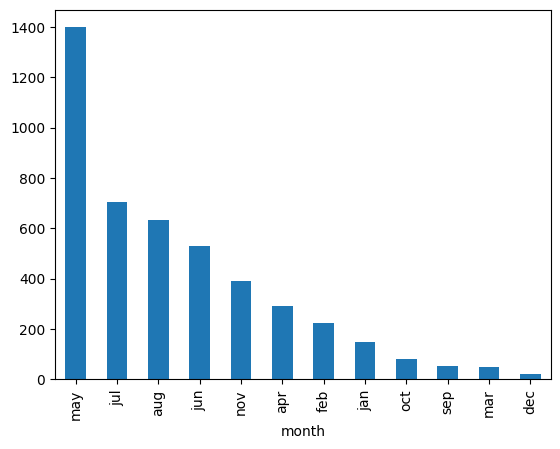

In [7]:
bank_marketing['month'].value_counts().plot.bar()

### Qué hacer con las características nominales

### Ordinales
Generamos un ordinal para reemplazar la caracteristica 'educacion'

In [8]:
bank_marketing["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [9]:
educ_mapping = {'unknown':0,
                'primary':1,
                'secondary':2,
                'tertiary':3}

In [10]:
bank_marketing["education"].replace(educ_mapping, inplace=True)

In [11]:
label = bank_marketing.y
features = bank_marketing.loc[:, bank_marketing.columns != 'y']

In [12]:
features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,1,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,2,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,3,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,3,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,2,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,2,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,3,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,2,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,2,no,1137,no,no,cellular,6,feb,129,4,211,3,other


#### Variables Dummies
Generar una variable por cada valor nominal y asignar 1 en el caso que ese valor ocurra en el ejemplo

In [13]:
pd.get_dummies(features.marital)

,divorced,married,single
0,False,True,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
4516,False,True,False
4517,False,True,False
4518,False,True,False
4519,False,True,False


Podemos transformar todo el dataset

In [14]:
pd.get_dummies(features).columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

O mejor, determinar sobre cuales características tiene sentido hacerlo,
y pasar sólo las columnas necesarias. Ejemplo


In [15]:
pd.get_dummies(features, columns=['marital','job'])

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,1,no,1787,no,no,cellular,19,oct,79,...,False,False,False,False,False,False,False,False,True,False
1,33,2,no,4789,yes,yes,cellular,11,may,220,...,False,False,False,False,False,True,False,False,False,False
2,35,3,no,1350,yes,no,cellular,16,apr,185,...,False,False,True,False,False,False,False,False,False,False
3,30,3,no,1476,yes,yes,unknown,3,jun,199,...,False,False,True,False,False,False,False,False,False,False
4,59,2,no,0,yes,no,unknown,5,may,226,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,2,no,-333,yes,no,cellular,30,jul,329,...,False,False,False,False,False,True,False,False,False,False
4517,57,3,yes,-3313,yes,yes,unknown,9,may,153,...,False,False,False,False,True,False,False,False,False,False
4518,57,2,no,295,no,no,cellular,19,aug,151,...,False,False,False,False,False,False,False,True,False,False
4519,28,2,no,1137,no,no,cellular,6,feb,129,...,False,False,False,False,False,False,False,False,False,False


___

### Propuesta de Ejercicio

Construir un dataset de entrenamiento que utilice el CSV de bank-marketing original para:
1. descartar la caracteristica 'day' y 'month' porque *pensamos* que no nos interesan
2. convertir en [0 1] todas las caracteristicas nominales de dos valores
3. convertir en variables dummies las caracteristicas nominales de más de dos valores
    

In [16]:
bank_marketing = pd.read_csv('https://raw.githubusercontent.com/christianolivamoya/MIAX11-ML/main/data/bank.csv', sep=';')
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
774,24,blue-collar,single,primary,no,111,yes,yes,unknown,27,may,42,4,-1,0,unknown,no
3121,53,management,married,tertiary,no,12,no,no,cellular,27,aug,345,10,-1,0,unknown,no
4380,57,housemaid,married,secondary,no,0,no,no,cellular,22,aug,197,2,-1,0,unknown,no
4411,49,technician,married,primary,no,230,yes,no,unknown,8,may,96,1,-1,0,unknown,no
2621,24,blue-collar,single,unknown,no,431,yes,no,unknown,3,jun,108,12,-1,0,unknown,no


In [17]:
# Descartamos las variables 'day' y 'month' porque consideramos que no aportan nada
bank_marketing.drop(columns=['day', 'month'], inplace=True)
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
353,50,management,married,tertiary,no,4,no,no,cellular,223,1,96,2,failure,no
2432,33,technician,divorced,tertiary,no,39,no,no,cellular,123,5,-1,0,unknown,no
1695,43,admin.,married,secondary,no,132,no,no,cellular,574,1,84,3,success,yes
1508,37,technician,single,secondary,yes,375,no,no,unknown,223,2,-1,0,unknown,no
1221,30,self-employed,married,secondary,no,1772,yes,no,cellular,158,4,-1,0,unknown,no


In [18]:
# Veamos los tipos de las variables. Aquellas que no sean numéricas habrá que transformarlas
bank_marketing.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [19]:
bank_marketing['job'].unique() # Job yo lo separaría como dummies ya que no hay relación de orden entre los diferentes trabajos

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [20]:
bank_marketing['marital'].unique() # Marital yo lo separaría como dummies ya que no hay relación de orden entre los diferentes estados civiles

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
bank_marketing['education'].unique() # Educación sí que lo puedo ordenar. Voy a ello en la siguiente celda

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [22]:
educ_mapping = {'unknown':0,
                'primary':1,
                'secondary':2,
                'tertiary':3}
bank_marketing['education'].replace(educ_mapping, inplace=True)
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
3830,57,technician,married,3,no,27069,no,yes,unknown,174,3,-1,0,unknown,no
719,39,blue-collar,married,2,no,1045,yes,yes,cellular,290,13,-1,0,unknown,no
4294,42,services,married,2,no,-246,yes,no,unknown,149,1,-1,0,unknown,no
4048,33,admin.,divorced,2,no,818,yes,yes,cellular,301,3,-1,0,unknown,no
4114,34,blue-collar,married,2,no,250,yes,no,unknown,193,6,-1,0,unknown,no


In [23]:
# Sigo analizando el resto de atributos "object"
bank_marketing.dtypes

age           int64
job          object
marital      object
education     int64
default      object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [24]:
bank_marketing['default'].unique() # Binario. Lo paso a 0 o 1

array(['no', 'yes'], dtype=object)

In [25]:
noyes_mapping = {'no':0, 'yes':1}
bank_marketing['default'].replace(noyes_mapping, inplace=True)
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
3389,46,management,divorced,2,0,361,yes,no,unknown,86,7,-1,0,unknown,no
3260,45,admin.,married,1,0,542,no,no,cellular,8,5,350,3,other,no
1654,44,blue-collar,married,1,0,-312,yes,no,unknown,22,3,-1,0,unknown,no
1408,49,blue-collar,divorced,0,0,39,yes,no,cellular,27,5,-1,0,unknown,no
4363,38,blue-collar,single,2,0,13156,yes,no,cellular,291,4,331,1,failure,no


In [26]:
# Sigo analizando el resto de atributos "object"
bank_marketing.dtypes

age           int64
job          object
marital      object
education     int64
default       int64
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [27]:
bank_marketing['housing'].unique() # Binario. Lo paso a 0 o 1

array(['no', 'yes'], dtype=object)

In [28]:
bank_marketing['housing'].replace(noyes_mapping, inplace=True)
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
4447,49,blue-collar,single,1,0,2146,1,no,cellular,1516,2,353,2,other,yes
3950,27,blue-collar,single,2,0,14,0,no,unknown,72,2,-1,0,unknown,no
405,45,self-employed,married,2,0,3098,1,no,cellular,159,2,-1,0,unknown,no
2179,51,technician,married,3,0,-3,0,no,cellular,91,9,-1,0,unknown,no
3564,30,technician,single,3,0,-970,0,yes,cellular,194,2,-1,0,unknown,no


In [29]:
# Sigo analizando el resto de atributos "object"
bank_marketing.dtypes

age           int64
job          object
marital      object
education     int64
default       int64
balance       int64
housing       int64
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [30]:
bank_marketing['loan'].unique() # Binario. Lo paso a 0 o 1

array(['no', 'yes'], dtype=object)

In [31]:
bank_marketing['loan'].replace(noyes_mapping, inplace=True)
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
1218,54,unknown,married,0,0,2508,0,0,unknown,34,8,-1,0,unknown,no
2626,48,blue-collar,married,1,0,5366,1,0,unknown,248,3,-1,0,unknown,no
1363,53,self-employed,married,3,0,2627,1,1,unknown,18,30,-1,0,unknown,no
339,51,self-employed,divorced,1,0,10924,0,0,cellular,106,2,-1,0,unknown,no
405,45,self-employed,married,2,0,3098,1,0,cellular,159,2,-1,0,unknown,no


In [32]:
# Sigo analizando el resto de atributos "object"
bank_marketing.dtypes

age           int64
job          object
marital      object
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [33]:
bank_marketing['contact'].unique() # Contact yo lo separaría como dummies ya que no hay relación de orden entre los diferentes modos de contacto

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [34]:
bank_marketing['poutcome'].unique() # Poutcome yo lo separaría como dummies ya que no hay relación de orden entre los diferentes modos de resultado

array(['unknown', 'failure', 'other', 'success'], dtype=object)

Conclusión: Hemos dejado como categóricos solamente los que queremos transformar a dummies. El resto los hemos establecido como numéricos:

In [35]:
bank_marketing.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
295,49,entrepreneur,divorced,0,1,-701,1,0,cellular,988,2,-1,0,unknown,yes
2045,56,management,married,3,0,318,0,1,telephone,246,3,-1,0,unknown,no
27,67,retired,married,0,0,696,0,0,telephone,119,1,105,2,failure,no
137,34,management,single,3,0,0,0,0,cellular,71,1,-1,0,unknown,no
4490,58,admin.,married,2,0,3496,1,0,unknown,111,4,-1,0,unknown,no


Ahora sí, separamos el target `y` de los atributos de mi dataset.

In [36]:
features = bank_marketing.drop(columns='y')
target = bank_marketing['y']

Ahora sí, podemos transformar a dummies aquellos atributos que siguen siendo "object" después de la fase de preprocesado.

In [37]:
features = pd.get_dummies(features)
features.sample(5)

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1975,50,2,0,1111,1,0,50,1,-1,0,...,True,False,False,True,False,False,False,False,False,True
1553,34,2,0,3990,1,0,633,7,-1,0,...,False,True,False,True,False,False,False,False,False,True
3885,41,2,0,1249,1,0,391,1,-1,0,...,False,True,False,True,False,False,False,False,False,True
1986,34,3,0,618,1,0,119,4,-1,0,...,False,False,True,False,False,True,False,False,False,True
4171,42,1,0,969,1,0,721,1,-1,0,...,False,True,False,True,False,False,False,False,False,True


## Propuesta de ejercicio

Vamos a utilizar con este dataset un árbol de decisión para ver si es capaz de clasificar correctamente los datos con estas variables que hemos obtenido.

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [39]:
dTree = DecisionTreeClassifier(max_depth=3)
_ = dTree.fit(features, target)

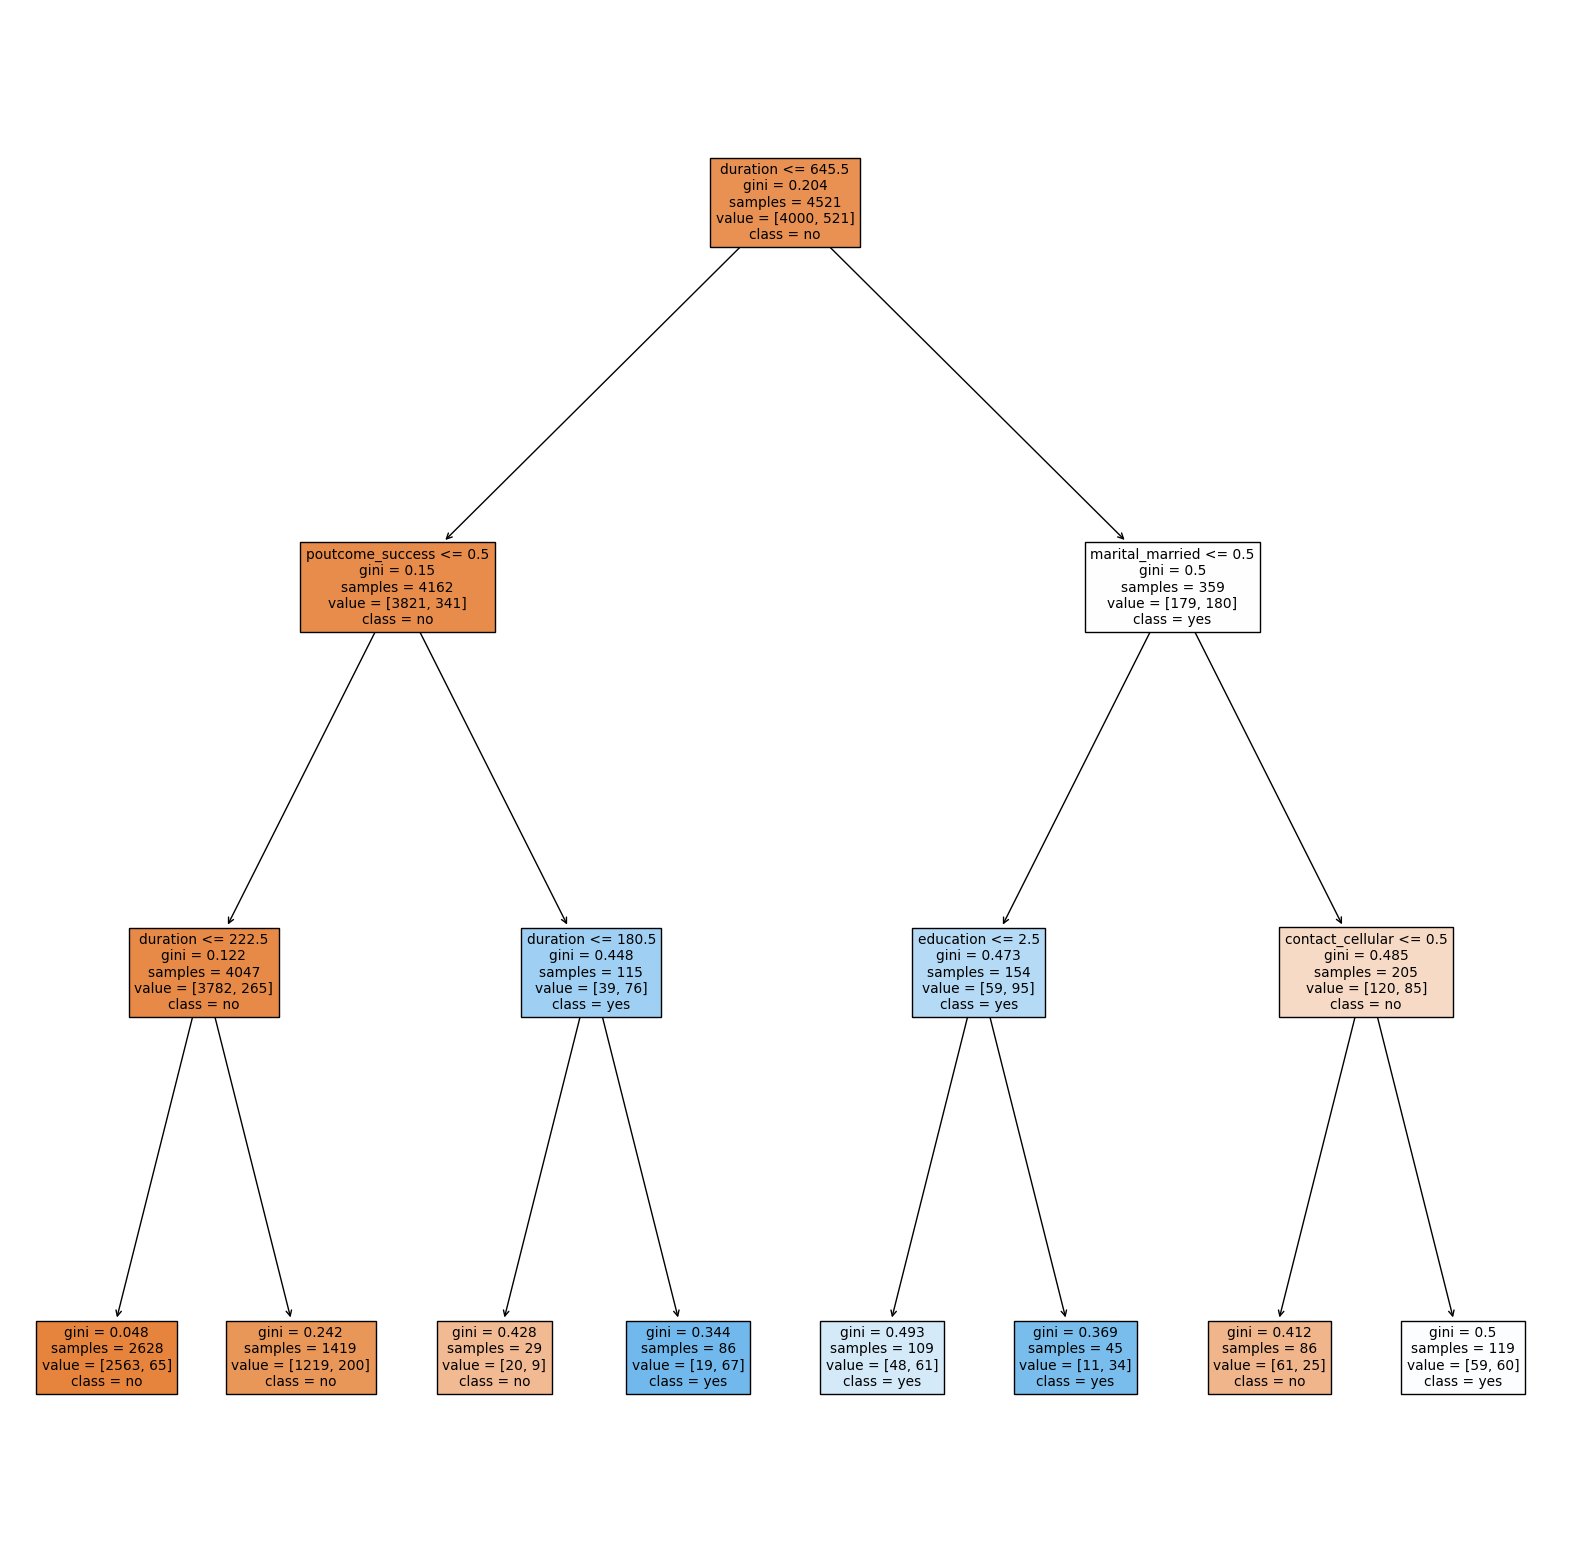

In [40]:
plt.figure(figsize=(20,20))
plot_tree(dTree,
          feature_names=features.columns,
          class_names=dTree.classes_,
          filled=True
          )
plt.show()

In [41]:
dTree.score(features, target)

0.9035611590356116

**PREGUNTA**: ¿Qué se nos ha olvidado? ¿Están las clases balanceadas?

In [42]:
np.unique(target.values, return_counts=True)

(array(['no', 'yes'], dtype=object), array([4000,  521]))